## Описание данных

* 'Churn' — факт оттока в текущем месяце;
Текущие поля в датасете:
Данные пользователя за предыдущий до проверки факта оттока месяц:
* 'gender' — пол
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
* 'Phone' — наличие контактного телефона
* 'Age' — возраст
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)

##### Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента

* 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
* 'Group_visits' — факт посещения групповых занятий
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон


## Шаг № 1. Знакомство с данными <a id="step1"></a>   

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('gym_churn.csv')

In [3]:
df.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [4]:
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

## Шаг № 2. Предобработка данных

Как мы могли заметить в данных нет пропусков, поэтому проверять отдельно не вижу смысла. Еще заметил, что не все названия столбцов приведены к нижнему регистру, поэтому надо это исправить.

In [7]:
df.columns = df.columns.str.lower()

На всякий случай проверим на дубликаты

In [8]:
df.duplicated(subset=None).sum()

0

### Вывод:

В ходе знакомства с данными мы обнаружили что они предоставленны корректно и без пропусков с дубликатами. Можем приступать к дальнейшему анализу.

## Шаг №3.  Исследовательский анализ данных (EDA)

Посмотрим на датасет через метод Describe и попытаемся найти отсутствующие признаки

In [9]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Сгруппируем данные по признаку оттоку Churn и посмотрим на средние значения

In [10]:
churn = df.groupby('churn').mean()

In [11]:
churn.head(10)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Если честно, то не особо удобно смотреть на такую таблицу, поэтому переделаем ее в вертикальный формат.

In [12]:
mapper = {'1': '{:.0f}',
          '2': '{:.1f}%'} 

In [13]:
churn.T.style.format(mapper)

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Создадим функцию которая будет строить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток). Графики такого типа используем для Бинарных значений.

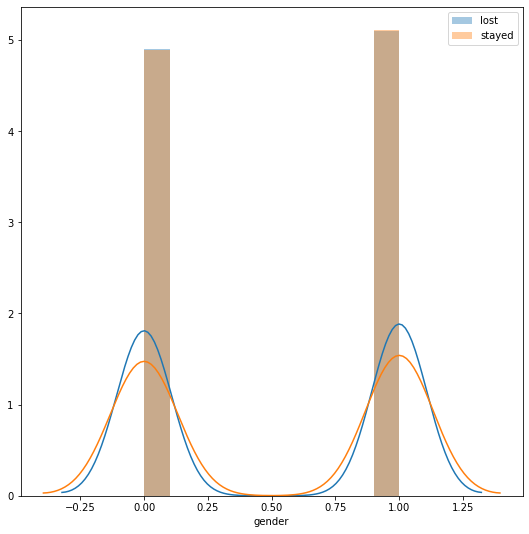

C:\Users\Viacheslav Pogorelyy\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Viacheslav Pogorelyy\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


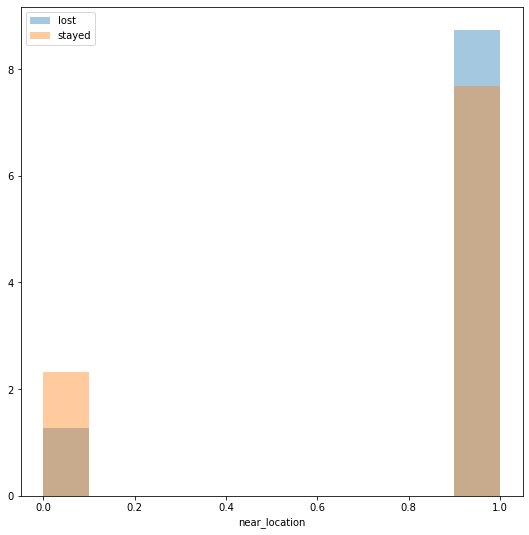

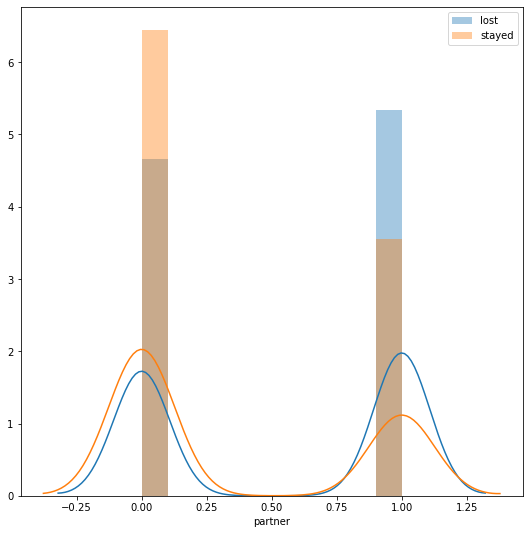

C:\Users\Viacheslav Pogorelyy\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


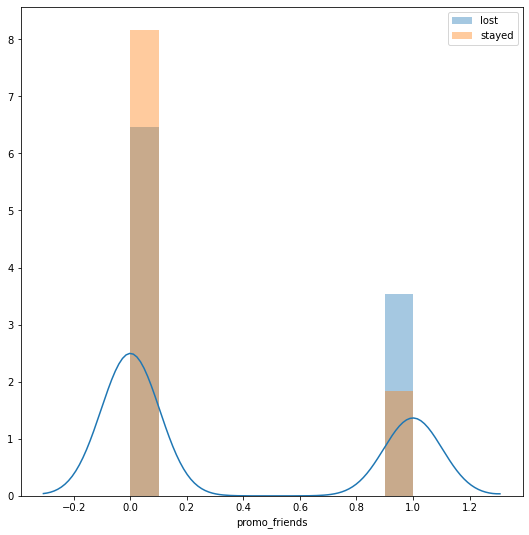

C:\Users\Viacheslav Pogorelyy\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


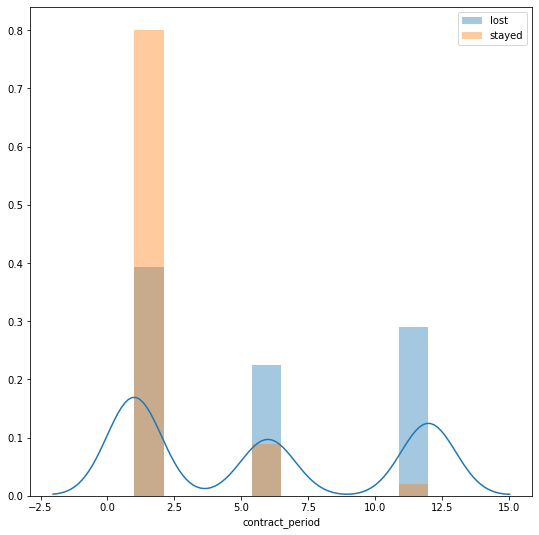

In [14]:
lost = df.query('churn == 0')
stayed = df.query('churn == 1')

for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(9, 9))
    sns.distplot(lost[column], label ='lost', bins = 10)
    sns.distplot(stayed[column], label ='stayed', bins = 10)
    plt.legend()
    plt.show()

На получившихся графикам мы можем наблюдать разницу по параметрам между ушедшими и оставшимися клиентами фитнес-центра.

Теперь построим распределение признаков для тех, кто ушёл (отток) и тех, кто остался (не попал в отток). 

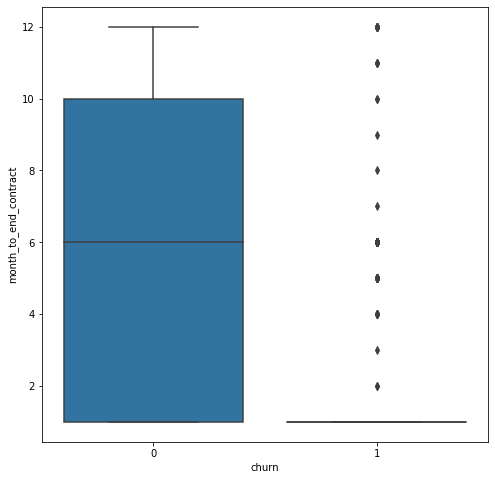

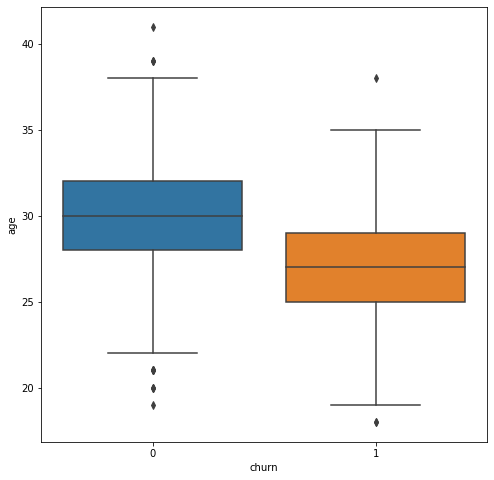

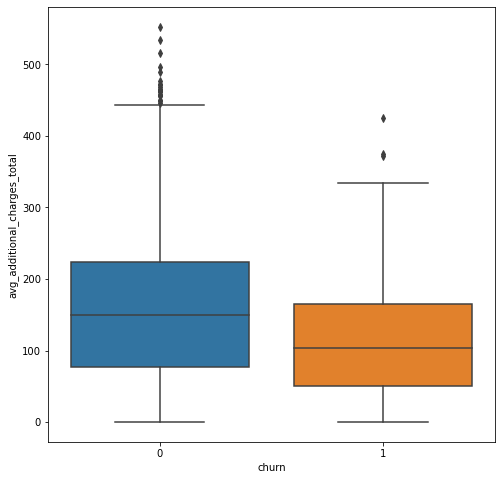

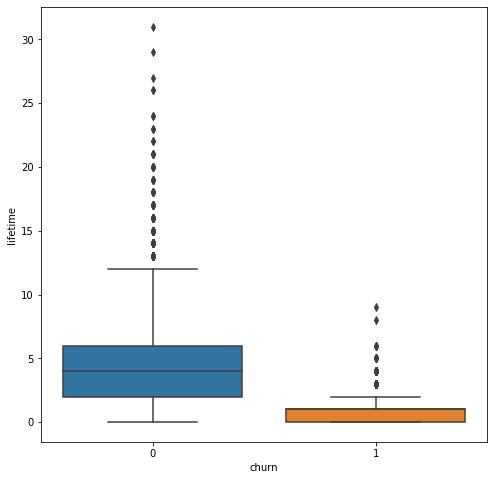

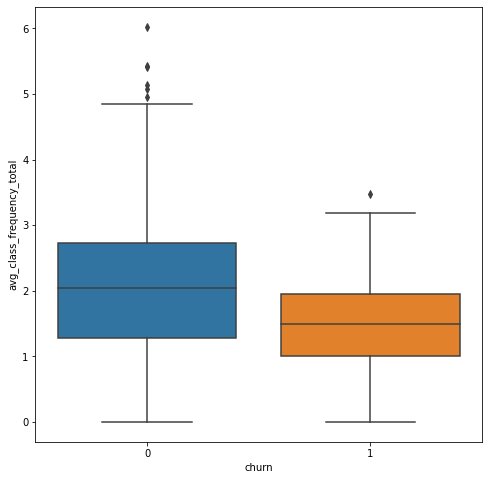

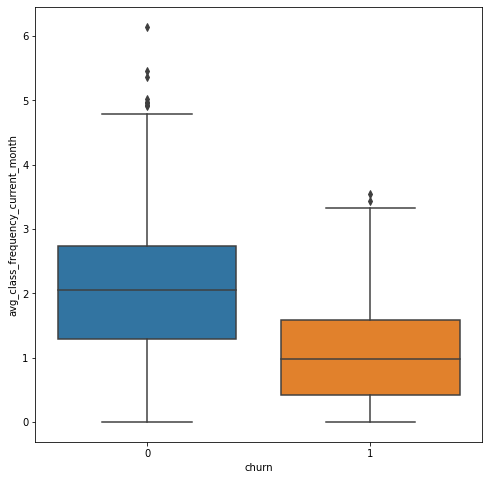

In [15]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(8, 8))
    sns.boxplot(x = 'churn', y = df[column], data = df)
    plt.show()


По количественным признакам мы видими, что на всех графиках распределния значений с параметром 0 больше, и это оставшиеся клиенты.

На основе имеющихся данных построим матрицу корреляции через метод heatmap.

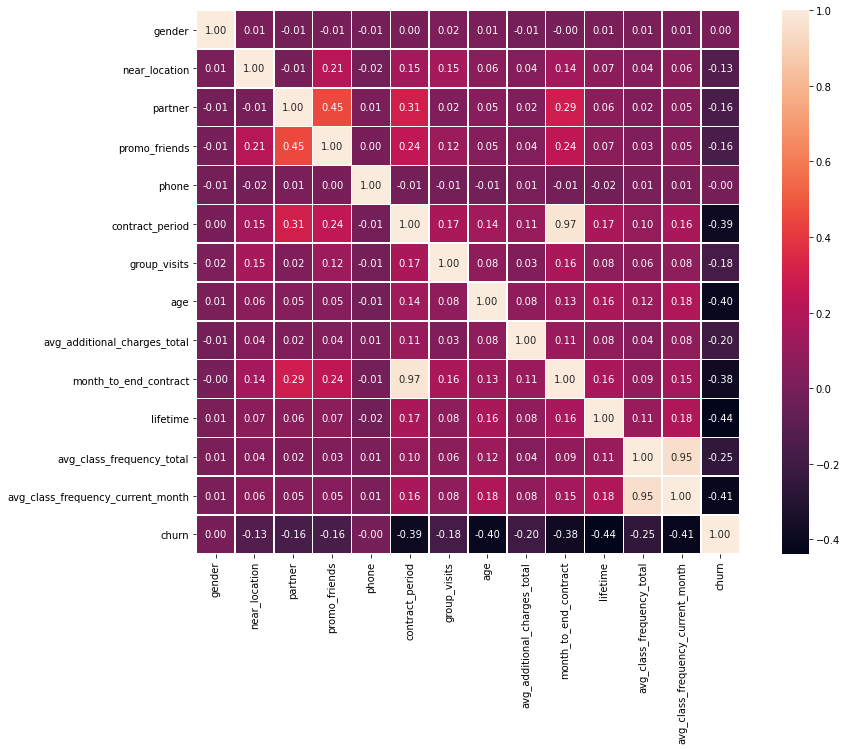

In [16]:
cm = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5, square=True)
plt.show()

## Вывод:

В ходе построения матрицы корреляции и удалось определить сильно коррелирующие друг с другом признаки - это contract_period - month_to_end_contract и avg_class_frequency_current_month - avg_class_frequency_total

## Шаг № 4.  Построение модели прогнозирования оттока пользователей <a id="step3"></a>

In [17]:
x = df.drop('churn', axis = 1)
y = df['churn']

Применим метод Логистической регрессии

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Зададим алгоритм для нашей модели

In [19]:
model = LogisticRegression()

Обучим модель

In [20]:
model.fit(x_train, y_train)

C:\Users\Viacheslav Pogorelyy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Воспользуемся уже обученной моделью, чтобы сделать прогнозы

In [21]:
predictions = model.predict(x_test)
probabilities =  model.predict_proba(x_test)[:,1]

Оценим метрики accuracy, precision, recall и F1 для Логистической регрессии

In [22]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.91
Precision: 0.83
Recall: 0.81
F1: 0.82


Применим метод Случайный лес

In [23]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

Преобразуем обучающие и валидационные наборы данных

In [24]:
x_train_st = scaler.transform(x_train)
x_test_st = scaler.transform(x_test)

Зададим алгоритм для новой модели на основе алгоритма случайного леса

In [25]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(x_train_st, y_train)
rf_predictions = rf_model.predict(x_test_st) 
rf_probabilities = rf_model.predict_proba(x_test_st)[:,1]

In [26]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.81
F1: 0.83


### Вывод: 

В результате сравнения двух метрик по моделям можно придти к выводу, что Логистическая регрессия показывает себя лучше. Это объясняется тем, что значение сравнительных метрик ближе к еденице.

## Шаг № 5.  Кластеризация пользователей<a id="step4"></a>

Стандартизируем данные

In [27]:
df_sс = df.drop(['churn'], axis=1)
df_columns_list = df_sс.columns
df_sс = StandardScaler().fit_transform(df_sс)
df_sс = pd.DataFrame(df_sс, columns = df_columns_list).astype('float64')

Построим матрицу расстояний функцией linkage() и нарисуем дендрограмму

In [28]:
linked = linkage(df_sс, method = 'ward')

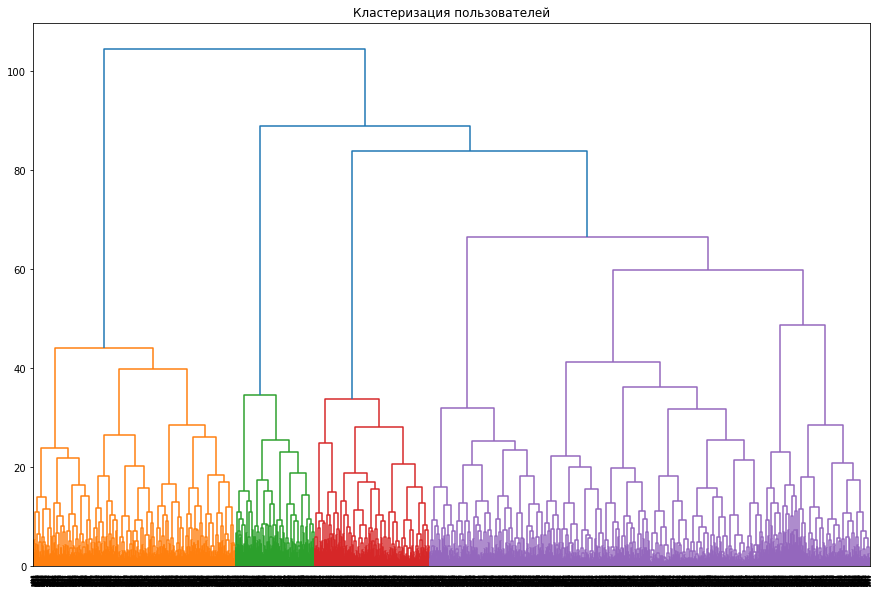

In [30]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

На мой взгляд мы можем выделить 5 кластеров, поскольку визуально получившийся результат можно описать так - 3 примерно равных кластера и один большой, который можно поделить пополам(поскольку занимает почти половину датасета). 

Задаём модель k_means с числом кластеров 5

In [31]:
km = KMeans(n_clusters = 5, random_state=1000)

Прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)

In [32]:
labels = km.fit_predict(df_sс)
df['cluster'] = labels

Посмотрим на сраднеие значения и на долю оттока Churn

In [33]:
df.groupby(['cluster']).mean().T

cluster,0,1,2,3,4
gender,0.483333,0.564286,0.501980,0.495050,0.522078
near_location,1.000000,0.976190,0.959406,0.000000,0.862338
partner,0.349206,0.358333,0.783168,0.463366,0.470130
promo_friends,0.238095,0.233333,0.574257,0.079208,0.306494
phone,1.000000,0.998810,1.000000,1.000000,0.000000
contract_period,1.953968,2.652381,10.895050,2.352475,4.787013
group_visits,0.339683,0.477381,0.541584,0.215842,0.425974
age,28.176984,30.116667,29.974257,28.477228,29.301299
avg_additional_charges_total,131.890430,161.084980,160.843413,135.457501,143.957664
month_to_end_contract,1.861905,2.447619,9.956436,2.198020,4.475325


### Вывод: 

По средним значениям можно сделать заключение, что кластер № 1 и №4 имеет самые высокие показатели по возрасту + много тратили на доп.услуги фитнес-центра + у них длина контракта больше всего. В целом слабее отттекают кластеры №1 и №4 со значениями оттока Churn 0.02 и 0.06.

Интересная особенность - люди из кластеров с самым низким оттоком чаще других посещают групповые занятия и в среднем чаще посещают зал.  

Сильно склонен к оттокам кластер №3. Чуть слабее результаты у кластеров № 2 и № 0.

Теперь посмотрим на распределения по кластерам.

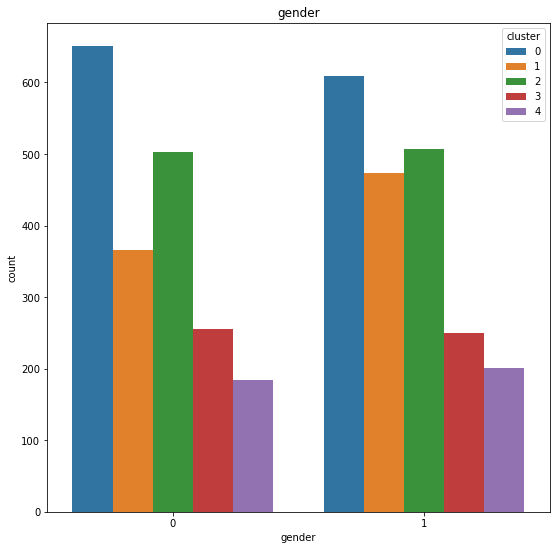

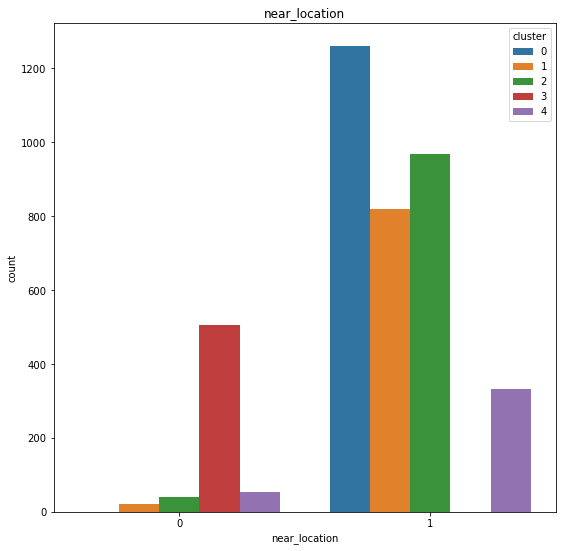

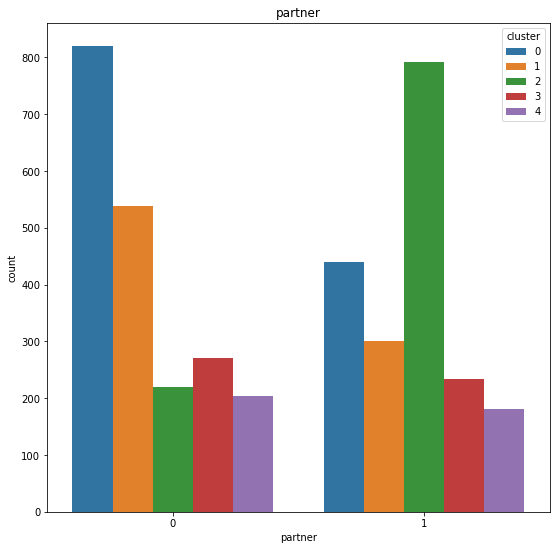

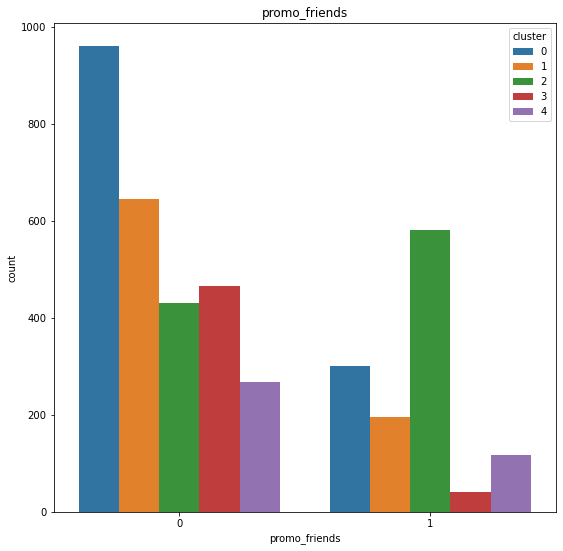

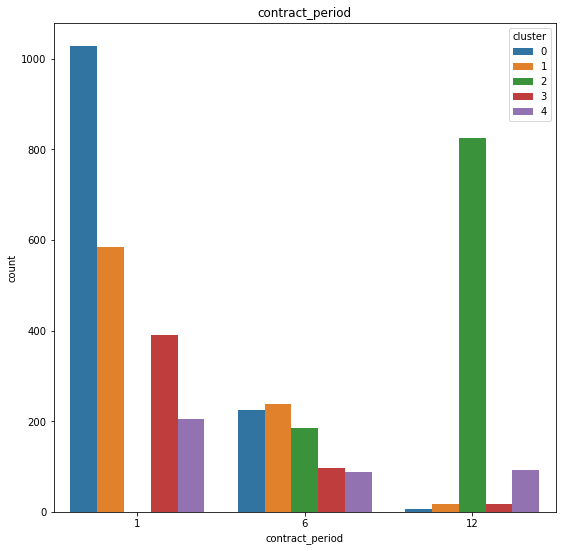

In [34]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(9, 9))
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.title(column)
    plt.show()

График распределения показывает, что кластер № 3 численно самый большой и все значения его выбиваются от остальных

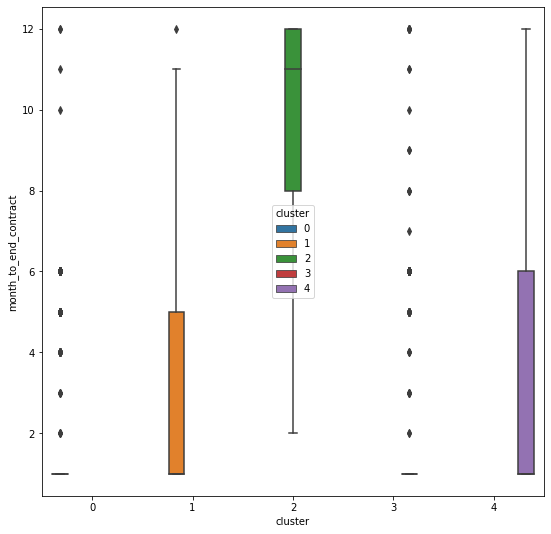

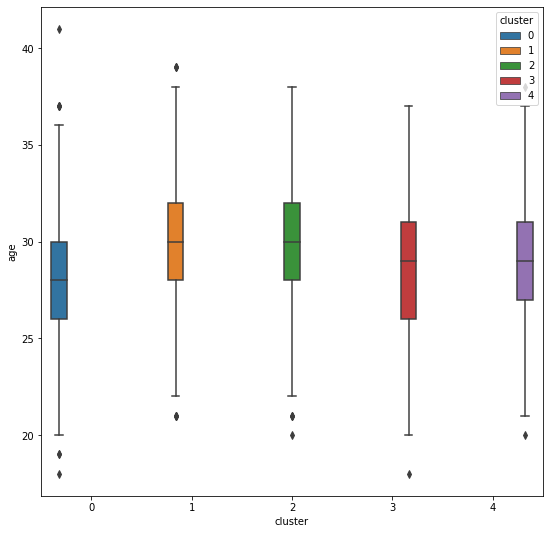

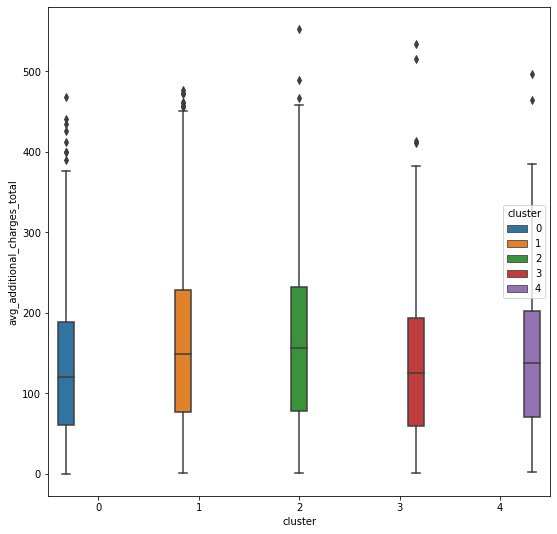

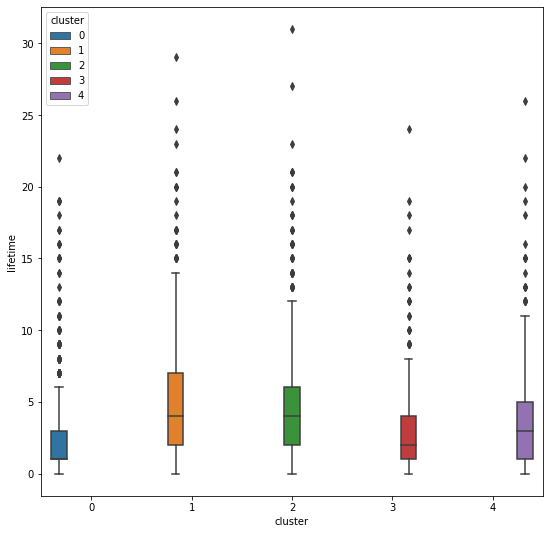

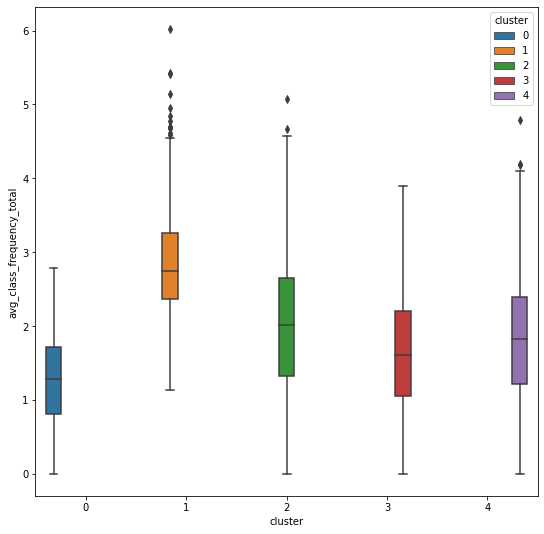

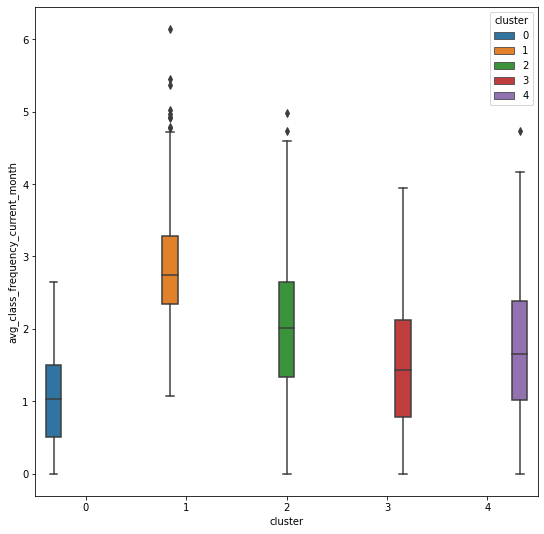

In [35]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(9, 9))
    sns.boxplot(x = 'cluster', y = df[column], data = df, hue='cluster')
    plt.show()

Здесь мы визуально показали то, о чем писали в выводе выше - Кластеры №1 и №4 самые идеальные по параметрам. 

# Итоговый вывод:<a id="step5"></a>

В ходе анализа удалось определить хороший портрет клиентов фитнес-центра. Они часто посещают групповые занятия + берут абонемент на длительный срок. Они часто посещают зал в течение недели и как правило, это люди среднено возраста. Кажется, что люди старше 30 начинают в серьез задумываться о своей физической форме и поэтому чаще приходят в фитнес-центр, чем более молодые клиенты. Возможно, так как люди более взрослые, то они в состоянии больше тратить на доп услуги.

Мои рекомендации по маркетинговой компании следующие: 

  * Я бы рекомендовал чаще рекламировать групповые занятия и мотивировать людей к их посещению. 
  * Необходимо сделать упор только на абонементы с длительным сроком действия, а мелкие сделать дороже. В таком случае, люди      будут  платить больше средств, из-за чего возможность бросить занятия  снизится. 
  * Для молодежи придумать и рекламировать какой-нибудь специальный тариф, который будет им по карману и даст дополнительные возможности при посещении фитнес-центра.
  * В целом мы уже имеем портрет оттекающих клиентов и необходимо сразу начинать с ними активную работу с точки зрения Обратной свяжи. Возможно именно собранная ОС поможет определить что не хватает или не устраивает каждого клиента индивидуально.